In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings

from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.stats.diagnostic import het_breuschpagan
# from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")

#### Propaganda

##### Análise descritiva

In [ ]:
# Lendo o arquivo CSV
propaganda = pd.read_csv('1 - propaganda.csv')

In [ ]:
# Mostrando as primeiras linhas do DataFrame
propaganda.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# Mostrando as últimas linhas do DataFrame
propaganda.tail()

,TV,Radio,Jornal,Vendas
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
# Dimensão do DataFrame
propaganda.shape

(200, 4)

In [7]:
# Verificando os tipos de dados das colunas
propaganda.dtypes

TV        float64
Radio     float64
Jornal    float64
Vendas    float64
dtype: object

In [8]:
# Verificar nulos
propaganda.isnull().sum()

TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64

In [36]:
# Tabela descritiva
propaganda.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Jornal,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Vendas,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


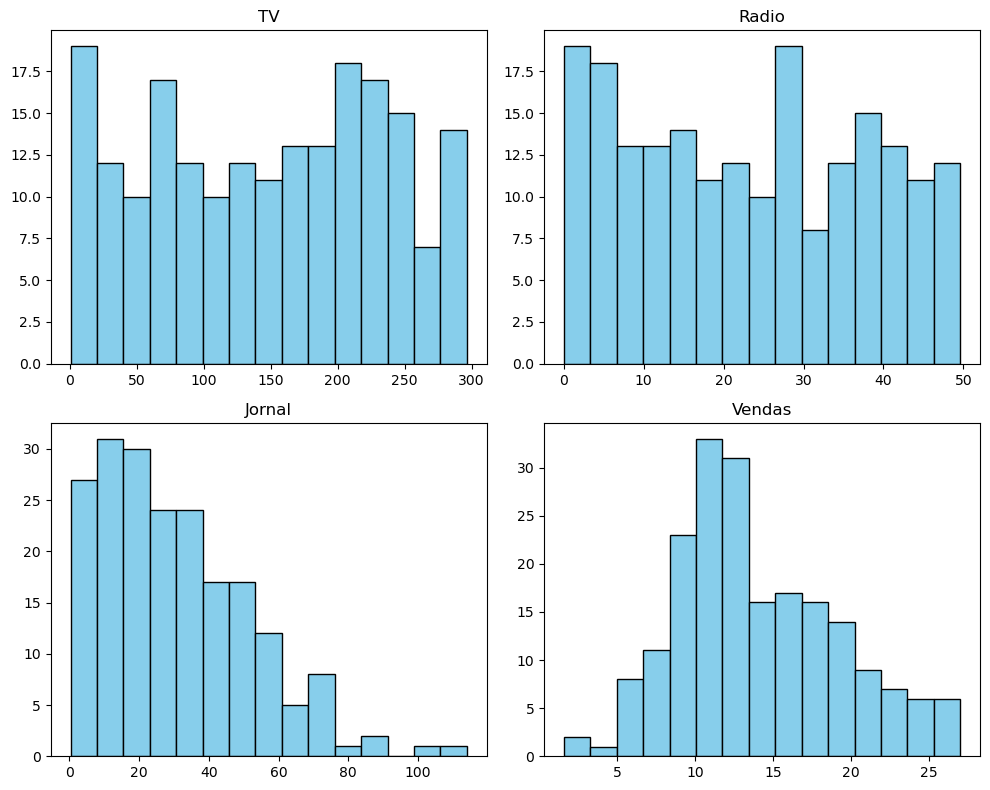

In [ ]:
# Histograma das variáveis 
propaganda.hist(bins=15, figsize=(10,8), grid=False, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


##### Calculo de correlação e covariancia

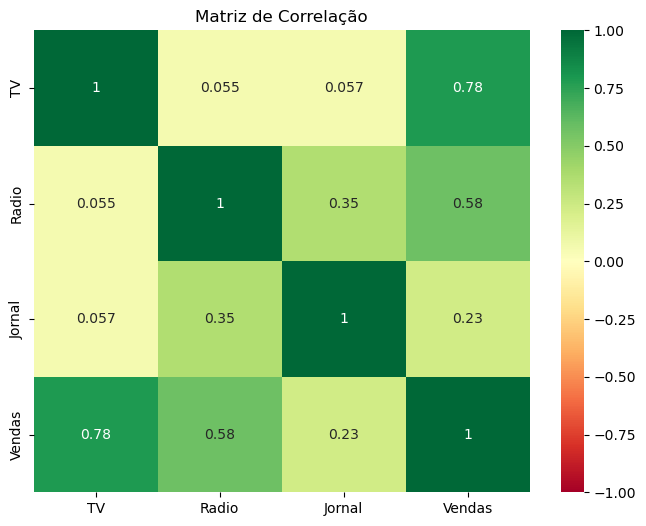

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Jornal,0.056648,0.354104,1.000000,0.228299
Vendas,0.782224,0.576223,0.228299,1.000000


In [92]:
# Correlações entre variáveis
corr = propaganda.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()
corr

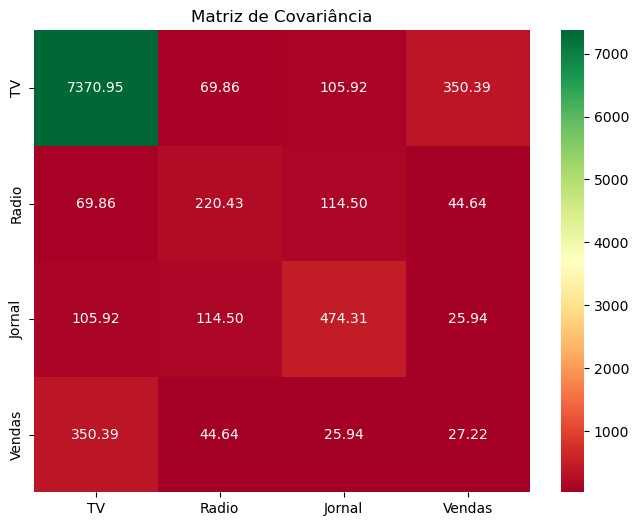

,TV,Radio,Jornal,Vendas
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Jornal,105.919452,114.496979,474.308326,25.941392
Vendas,350.390195,44.635688,25.941392,27.221853


In [44]:
# Correlações entre variáveis
cov = propaganda.cov()
plt.figure(figsize=(8,6))
sns.heatmap(cov, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Covariância")
plt.show()
cov


##### Modelo de regressão

In [48]:
X = propaganda[["TV", "Radio", "Jornal"]]
y = propaganda["Vendas"]

# adicionar constante (intercepto)
X_const = sm.add_constant(X)

modelo = sm.OLS(y, X_const).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        20:55:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

##### Análise de resíduos

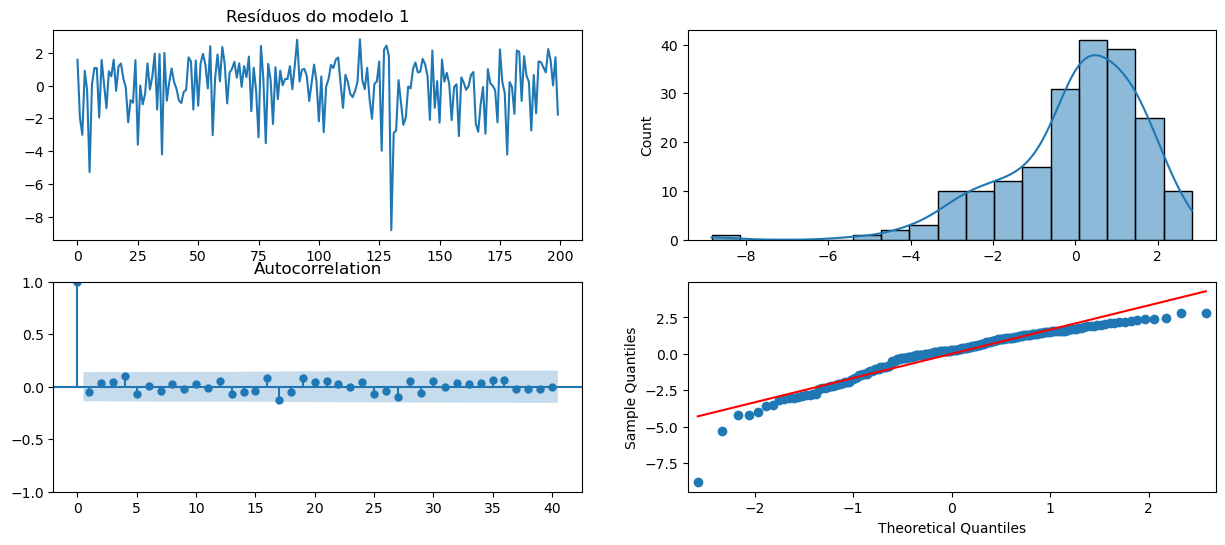

In [66]:
residuos = modelo.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.histplot(residuos,ax=ax[0][1], kde=True)
plot_acf(residuos,lags=40, ax=ax[1][0])
qqplot(residuos,line='s', ax=ax[1][1]);

##### Análise de multicolineariedade

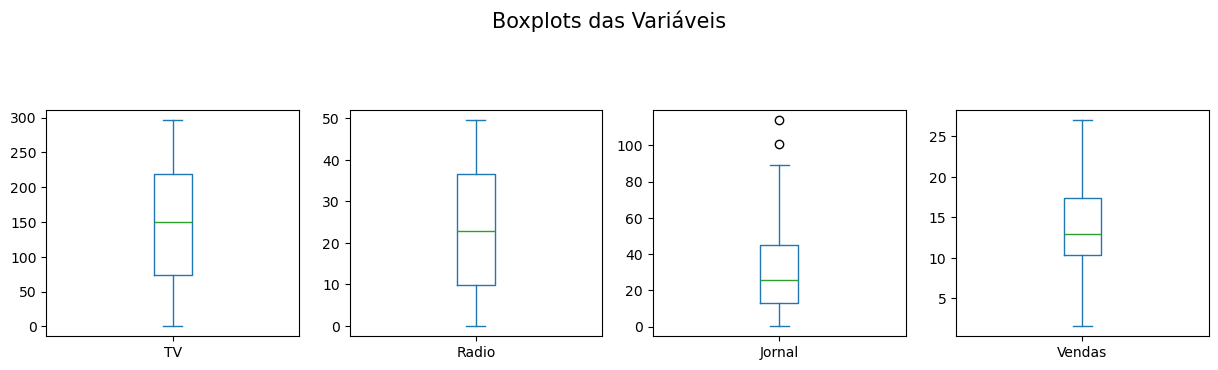

In [18]:
# Boxplot das variáveis numéricas
propaganda.plot(kind='box', subplots=True, layout=(3,4), figsize=(15,10))
plt.suptitle('Boxplots das Variáveis', size=15);

In [72]:
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["variavel"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

vif_data

,variavel,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Jornal,1.145187


##### Análise do modelo

In [93]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        22:24:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

|R²|R² ajustado|
|--|--|
|0.897|0.896|

Indica que aproximadamente 89,6% da variabilidade das vendas é explicada pelos investimentos em mídia.

F-statistic = 570,3 com p < 0,0001, significa que o modelo é altamente significativo.

| Variável | Coeficiente                                                                                                                                 |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Intercepto (2.9389)** | Valor esperado das vendas quando todos os investimentos são zero.                                                                                                                             |               |
| **TV (0.0458)**         | **Cada 1 unidade monetária investida em TV aumenta as vendas em 0.0458 unidades**, mantendo as demais variáveis constantes. É o preditor mais forte.                                          |               |
| **Rádio (0.1885)**      | **Cada 1 unidade investida em Rádio aumenta as vendas em 0.1885 unidades.** Apesar de numericamente maior, o investimento típico em Rádio é muito menor, portanto o impacto total é moderado. |               |
| **Jornal (-0.0010)**    | Efeito praticamente nulo. **P-valor = 0.860**, indicando ausência total de significância estatística.                                                                                         |               |

